# PV Production

Use the Solcast dataset to calculate the PV production for a given location. This notebook will study the data from Bath, UK.

In [28]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# remove pandas warning
pd.options.mode.chained_assignment = None  # default='warn'

# matplotlib style size
plt.rcParams['figure.figsize'] = (12.8, 7.2)


In [2]:
df = pd.read_csv('Solcast_PT30M.csv')
df.head()


,PeriodEnd,PeriodStart,Period,AirTemp,CloudOpacity,Dni,PrecipitableWater,RelativeHumidity,WindDirection10m,WindSpeed10m
0,2007-01-01T01:00:00Z,2007-01-01T00:30:00Z,PT30M,8.0,0.0,0,11.6,81.4,249,9.9
1,2007-01-01T01:30:00Z,2007-01-01T01:00:00Z,PT30M,7.7,0.0,0,11.3,83.3,251,9.7
2,2007-01-01T02:00:00Z,2007-01-01T01:30:00Z,PT30M,7.3,0.0,0,11.1,85.2,253,9.5
3,2007-01-01T02:30:00Z,2007-01-01T02:00:00Z,PT30M,7.0,0.0,0,10.9,87.2,255,9.4
4,2007-01-01T03:00:00Z,2007-01-01T02:30:00Z,PT30M,6.6,0.0,0,10.7,89.2,256,9.2


In [3]:
df['PeriodEnd'] = pd.to_datetime(df['PeriodEnd'])
df['PeriodStart'] = pd.to_datetime(df['PeriodStart'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265870 entries, 0 to 265869
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   PeriodEnd          265870 non-null  datetime64[ns, UTC]
 1   PeriodStart        265870 non-null  datetime64[ns, UTC]
 2   Period             265870 non-null  object             
 3   AirTemp            265870 non-null  float64            
 4   CloudOpacity       265870 non-null  float64            
 5   Dni                265870 non-null  int64              
 6   PrecipitableWater  265870 non-null  float64            
 7   RelativeHumidity   265870 non-null  float64            
 8   WindDirection10m   265870 non-null  int64              
 9   WindSpeed10m       265870 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(5), int64(2), object(1)
memory usage: 20.3+ MB


In [4]:
df.isnull().sum()

PeriodEnd            0
PeriodStart          0
Period               0
AirTemp              0
CloudOpacity         0
Dni                  0
PrecipitableWater    0
RelativeHumidity     0
WindDirection10m     0
WindSpeed10m         0
dtype: int64

In [5]:
df.max()

PeriodEnd            2022-03-01 23:30:00+00:00
PeriodStart          2022-03-01 23:00:00+00:00
Period                                   PT30M
AirTemp                                   31.4
CloudOpacity                             100.0
Dni                                        957
PrecipitableWater                         47.6
RelativeHumidity                         100.0
WindDirection10m                           360
WindSpeed10m                              16.8
dtype: object

In [6]:
df.min()

PeriodEnd            2007-01-01 01:00:00+00:00
PeriodStart          2007-01-01 00:30:00+00:00
Period                                   PT30M
AirTemp                                   -9.0
CloudOpacity                               0.0
Dni                                          0
PrecipitableWater                          2.6
RelativeHumidity                          30.6
WindDirection10m                             0
WindSpeed10m                               0.0
dtype: object

In [15]:
# numpy range of days between start and end
days = np.arange(df['PeriodStart'].min(), df['PeriodStart'].max(), dtype='datetime64[D]')


In [16]:
days.size, df['PeriodStart'].dt.date.nunique()

(5538, 5539)

From what we see so far:
  - The data has no null values
  - The values make sense
  - There are no missing days

Are there missing 30-minute interval values, though?

In [19]:
# numpy range of days, with 30 minutes granularity, between start and end
days_30min = np.arange(df['PeriodStart'].min(), df['PeriodStart'].max(), dtype='datetime64[30m]')


In [23]:
days_30min.size, df['PeriodStart'].nunique()

(265869, 265870)

No missing values at all! The data is perfect as is.

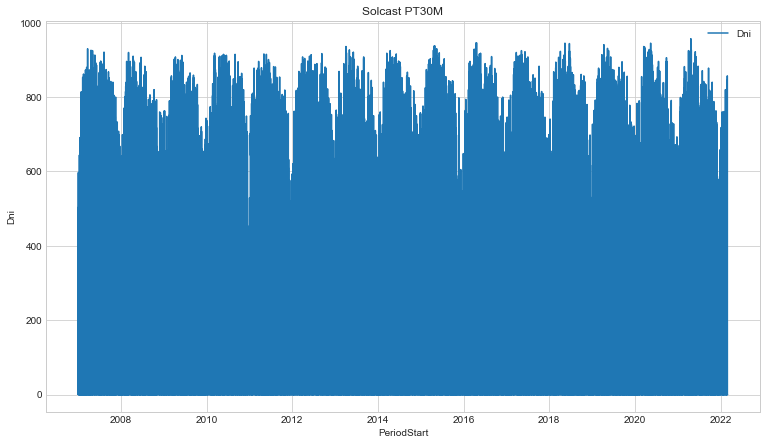

In [31]:
# plot the data
plt.title('Solcast PT30M')

plt.plot(df['PeriodStart'], df['Dni'], label='Dni')
plt.xlabel('PeriodStart')
plt.ylabel('Dni')
plt.legend()
plt.show()


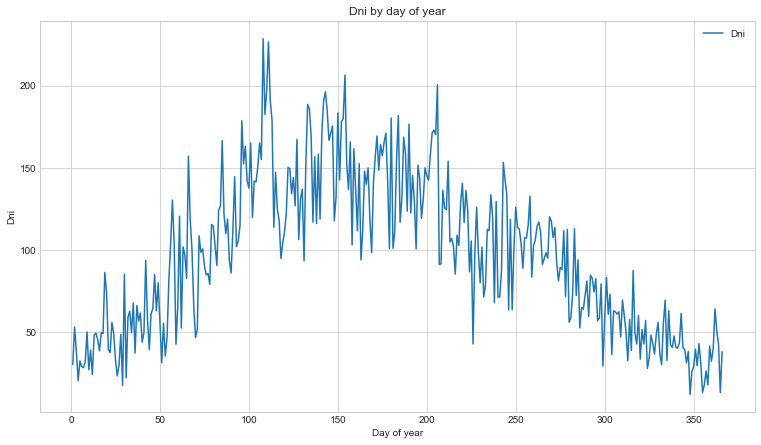

In [37]:
# group in year
df_year = df.groupby(df['PeriodStart'].dt.dayofyear).mean().reset_index()

df_year.plot(x='PeriodStart', y='Dni', label='Dni', title='Dni by day of year')
plt.xlabel('Day of year')
plt.ylabel('Dni')
plt.legend()
plt.show()


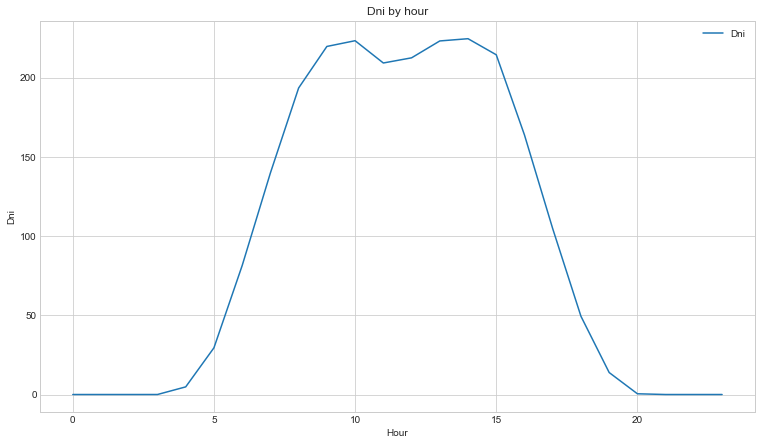

In [38]:
df_daily = df.groupby(df['PeriodStart'].dt.hour).mean().reset_index()

df_daily.plot(x='PeriodStart', y='Dni', label='Dni', title="Dni by hour")
plt.xlabel('Hour')
plt.ylabel('Dni')
plt.legend()
plt.show()


## Simulation

In [ ]:
df_banes = pd.read_csv("../tese")